<a href="https://colab.research.google.com/github/freddym123/Project-Report/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.8 MB/s eta 0:00:00


In [ ]:
from google.colab import files

In [ ]:
import tensorflow as tf
from tensorflow import keras
import sklearn
import kagglehub
import pandas as pd
import numpy as np
np.random.seed(42)
import matplotlib as mpl
import matplotlib.pyplot as plt
import zipfile
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras_preprocessing.image import ImageDataGenerator

In [ ]:

!pip install kaggle
files.upload()
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


!pip install kagglehub

import kagglehub

#!/bin/bash
!kaggle datasets download prasunroy/natural-images

import zipfile
with zipfile.ZipFile('/content/natural-images.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

dataset_path = os.path.join('/content', 'natural_images')
datagen = ImageDataGenerator(rescale=1./255)
data_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=100,
    class_mode='sparse'
)

X, y = [], []
for i in range(len(data_generator)):
    batch_x, batch_y = data_generator[i]
    X.append(batch_x)
    y.append(batch_y)
X = np.concatenate(X, axis=0)
y = np.concatenate(y, axis=0)

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)
#
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_valid.shape)
print("Test set shape:", X_test.shape)

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/prasunroy/natural-images
License(s): CC-BY-NC-SA-4.0
natural-images.zip: Skipping, found more recently modified local copy (use --force to force download)
Found 6899 images belonging to 8 classes.
Training set shape: (4415, 64, 64, 3)
Validation set shape: (1104, 64, 64, 3)
Test set shape: (1380, 64, 64, 3)


In [ ]:
cnn = tf.keras.models.Sequential() #initializing the CNN
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=7, activation="relu", padding = "same", input_shape=[64, 64, 3])) #Convolution 1
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 1
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding = "same")) #Convolution 2
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding = "same")) #Convolution 3
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 2
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding = "same")) #Convolution 4
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding = "same")) #Convolution 5
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 3
cnn.add(tf.keras.layers.Flatten()) #Flaterning
cnn.add(tf.keras.layers.Dense(units=128, activation="relu"))#Full Connection1
tf.keras.layers.Dropout(0.5)
cnn.add(tf.keras.layers.Dense(units=64, activation="relu"))#Full Connection2
tf.keras.layers.Dropout(0.5)
cnn.add(tf.keras.layers.Dense(units= 8, activation= "softmax"))#Output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 64, 64, 64)          │           9,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,222,216 (12.29 MB)

 Trainable params: 3,222,216 (12.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])



In [ ]:
history = cnn.fit(X_train, y_train, batch_size = 100, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 362s 7s/step - accuracy: 0.3506 - loss: 1.7404 - val_accuracy: 0.7201 - val_loss: 0.8146
Epoch 2/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 334s 7s/step - accuracy: 0.7494 - loss: 0.6911 - val_accuracy: 0.7763 - val_loss: 0.6641
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 367s 7s/step - accuracy: 0.7888 - loss: 0.5691 - val_accuracy: 0.8370 - val_loss: 0.4471
Epoch 4/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 336s 7s/step - accuracy: 0.8505 - loss: 0.3831 - val_accuracy: 0.8116 - val_loss: 0.4884
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 362s 7s/step - accuracy: 0.8861 - loss: 0.3197 - val_accuracy: 0.8605 - val_loss: 0.3952


In [ ]:
score = cnn.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 27s 615ms/step - accuracy: 0.8475 - loss: 0.3861


In [ ]:
print('Total loss on Testing Set:', score[0])

Total loss on Testing Set: 0.3902449905872345


In [ ]:
print('Accuracy of Testing Set:', score[1])

Accuracy of Testing Set: 0.8463768362998962


In [ ]:
X_new = X_test[:3]
y_proba = cnn.predict(X_new)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


In [ ]:
y_pred = np.argmax(y_proba, axis=-1)
y_test_int = y_test.astype(int)
y_pred

array([4, 2, 2])

In [ ]:
class_names = ["Airplane", "Car", "Cat", "Dog", "Flower", "Fruit", "Motorbike", "Person"]

In [ ]:
np.array(class_names)[y_pred]

array(['Flower', 'Cat', 'Cat'], dtype='<U9')

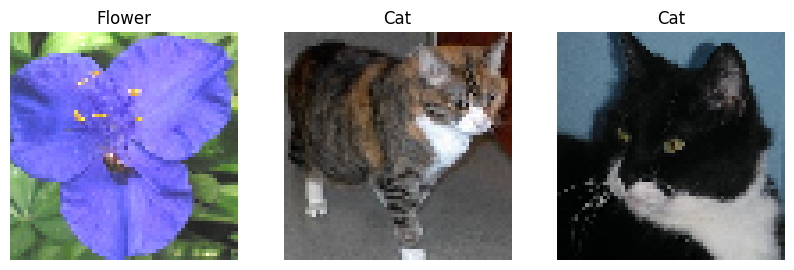

In [ ]:
plt.figure(figsize=(10, 4))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(X_new[i])
    plt.axis('off')
    plt.title(f"{class_names[y_test_int[i]]}")
plt.show()